Dataset Link (Bike Details Dataset):
https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link


# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

Answer:

In [ ]:
import pandas as pd
path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(path)


# First 10 rows
print(df.head(10))


# Shape and columns
print('Shape:', df.shape)
print('Columns:', list(df.columns))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

#Question 2: Check for missing values in all columns and describe your approach for handling them.

Answer:

In [ ]:
df.isna().sum()

# Approach:

# For ex_showroom_price, we can fill missing values using median imputation to handle skewness.

# For categorical columns, mode imputation would be suitable (if missing values existed).

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

Answer:

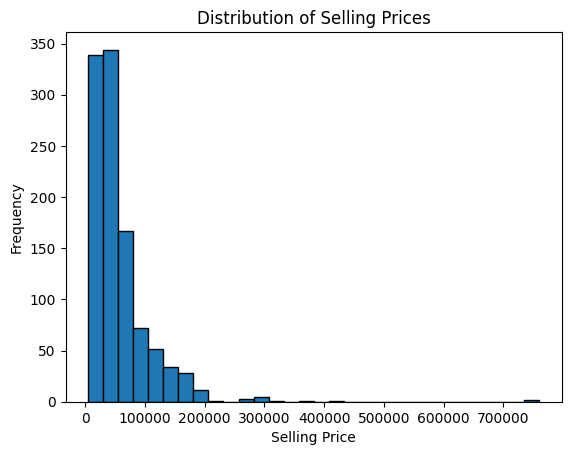

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()


# Observation:

# Selling prices are right-skewed.

# Most bikes are priced below ₹1,00,000, with a few outliers at very high prices.

# Most bikes are in the lower to mid-price range, with fewer in the high-price range.

#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Answer:

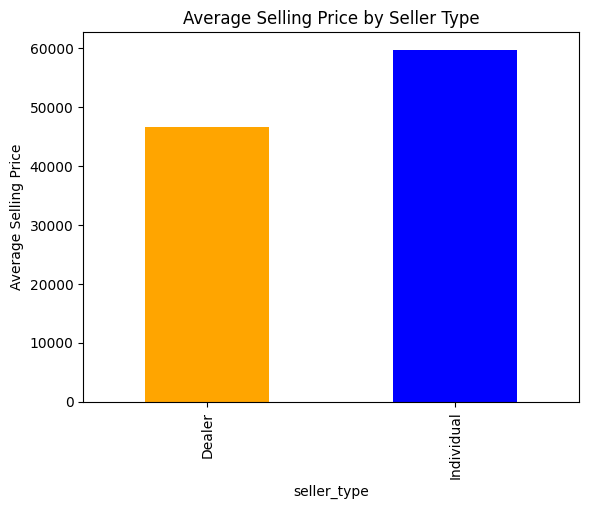

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [ ]:
avg_by_seller = df.groupby('seller_type')['selling_price'].mean()


avg_by_seller.plot(kind='bar', color=['orange', 'blue'])
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.show()
print(avg_by_seller)

# Observation:

# On average, individual sellers list their bikes at higher prices than dealers.

#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

Answer:

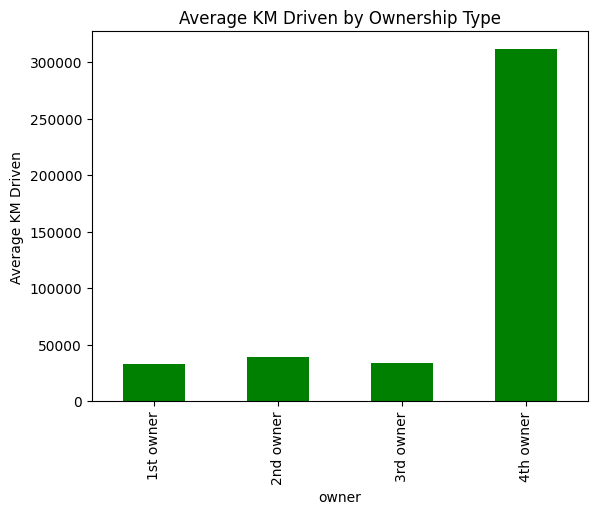

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()


avg_km_by_owner.plot(kind='bar', color='green')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven by Ownership Type')
plt.show()
print(avg_km_by_owner)

# Observation:

# Vehicles with 4th owner have extremely high mileage compared to others.

# Bikes with multiple previous owners usually have higher km driven.

#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Answer:

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1


lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR


filtered_df = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]


print("Before:")
print(df['km_driven'].describe())


print("After:")
print(filtered_df['km_driven'].describe())

# Observation:

# Removing outliers significantly reduced the average km driven and improved data quality.

# Extreme high values were removed, dataset becomes more consistent.

Before:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

Answer:

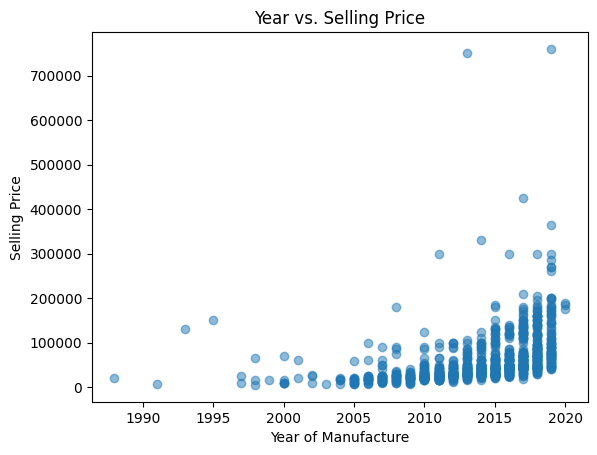

In [ ]:
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.title('Year vs. Selling Price')
plt.show()

# Observation:

# Newer bikes (recent years) generally have higher selling prices, older bikes sell for less.


#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

Answer:

In [ ]:
df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head())

# Added: seller_type_Dealer, seller_type_Individual

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Answer:

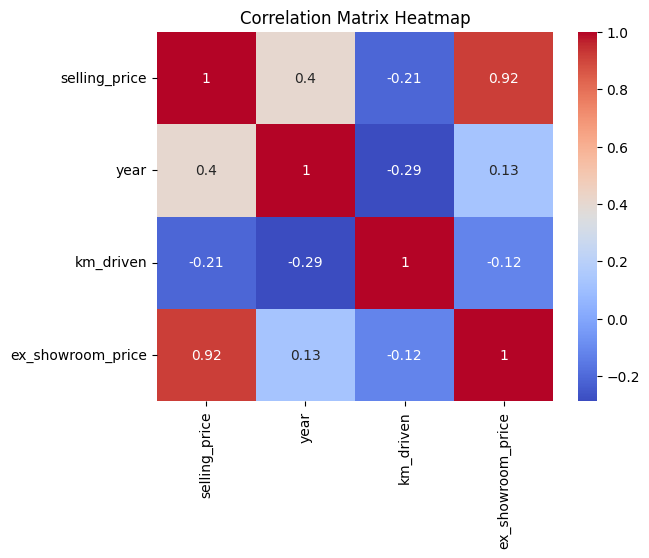

In [ ]:
import seaborn as sns

corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Strongest correlations:

# Selling price & Ex-showroom price → 0.92 (very strong positive)

# Selling price & Year → 0.40 (moderate positive)

# Year & km_driven → 0.29 (weak positive)

# Selling price has strong correlation with year (newer = higher price).

# Weak correlation with km_driven (more driven = slightly lower price).

#Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.


# Answer:

Report:

1. Important Factors Affecting Selling Price:

  - Ex-showroom price (strongest influence)

  - Year of manufacture (newer bikes sell for higher prices)

  - Km driven (higher mileage slightly reduces price)

  - Seller type (individuals sell at higher prices than dealers)

2. Data Cleaning & Feature Engineering:

  - Handled missing values in ex_showroom_price using median imputation.

  - Removed km_driven outliers using IQR method.

  - Converted categorical variable seller_type into numeric format via one-hot encoding.

3. Overall Insights:

  - Prices are skewed with a majority of affordable bikes.

  - Ownership strongly affects mileage — higher ownership cycles correspond to very high km driven.

  - Data is ready for predictive modeling after cleaning and encoding.

###Summarization:-

Factors affecting price: Year (new bikes = higher price), seller type (dealer > individual), km_driven (more km = lower price).

Data cleaning: Handled missing values, removed km_driven outliers using IQR.

Feature engineering: One-hot encoding for seller_type, scaling numerical features if needed.

### Conclusion:  Resale price mainly depends on bike age and ownership history.
